In [22]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import time
import math

# Problem 3 

In [23]:

LOGISTIC_X_PATH = "Assignment/data/q3/logisticX.csv"
LOGISTIC_Y_PATH = "Assignment/data/q3/logisticY.csv"

def read_input():
    data = np.loadtxt(LOGISTIC_X_PATH, dtype = np.float64, delimiter = ",")
    x = np.ones((len(data) , 3) , dtype = np.float64)
    x[: , 1 : 3] = data
    y = np.loadtxt(LOGISTIC_Y_PATH, dtype = np.int64)
    return x , y

def normalize_x(x):
    for col in range (1,3):
        mean = np.mean(x[: , col])
        variance = np.mean((x[: , col] - mean) ** 2)
        standard_dev = np.sqrt(variance)
        x[: , col] =  (x[: , col] - mean) / standard_dev
    return x

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

sigmoid_vectorised = np.vectorize(sigmoid)

x , y = read_input()
x = normalize_x(x)



In [24]:
def show_plot(x, y , thetaT):
    plt.clf()
    plt.title("Problem 3: Logistic Regression") 
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.scatter(x[1, y == 1], x[2, y == 1], marker = "x", facecolor = "green" , label = "y(i) = 1")
    plt.scatter(x[1, y == 0], x[2, y == 0], marker = ".", facecolor = "red" , label = "y(i) = 0")
    

    x1_separating = np.arange(-5, 5, 0.1)
    x2_separating = (-thetaT[1] * x1_separating - thetaT[0])/ thetaT[2]
    plt.plot(x1_separating, x2_separating, color = "blue" , label = "decision boundary")
    plt.legend()
    plt.savefig("./Assignment/data/q3/desision_boundary" ,  dpi = 300)

    plt.show()

0 learned: [ 0.40125316  2.5885477  -2.72558849]
Number of iterations used: 9
Running time: 0.013745784759521484 seconds
Error after last iteration: 0.03554584388835826


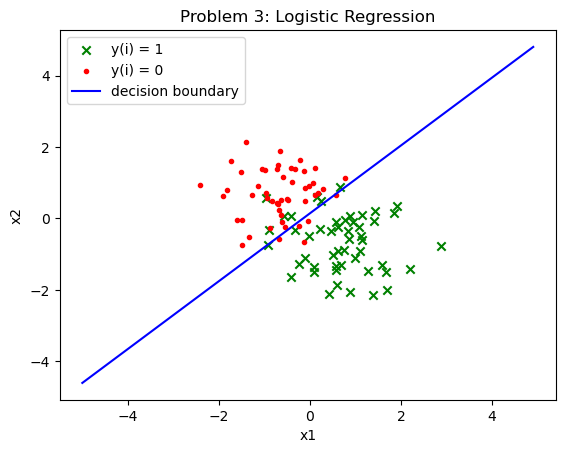

In [25]:

def operation(x):
    return np.outer(x , x)


def newtons_method(x , y , tolerance = 0.0000000000000001):
    thetaT = np.zeros(3 , dtype = np.float64)
    result = np.apply_along_axis(operation , axis = 1 , arr = x)
    J_prev = None
    J_curr = None
    itr = 0 
    ITR_MAX = 100
    while (itr < ITR_MAX):
        coeff_1 = sigmoid_vectorised(np.matmul(x , thetaT))
        

        coeff_2 = 1 - coeff_1       
        coeff = coeff_1 * coeff_2
    
        J_curr =  np.sum((y - coeff_1) ** 2) / (2 * len(y))
        if (J_prev != None and abs(J_prev - J_curr) < tolerance):
            break
        hessian = np.zeros((3 , 3) , dtype = np.float64)
        hessian = result * coeff[:, np.newaxis, np.newaxis]
        hessian  = np.sum(hessian , axis = 0)
   
     
        gradient_l = np.matmul(y - coeff_1 , x)

        hessian_inv = np.linalg.pinv(hessian)

        del_thetaT = np.matmul(hessian_inv , gradient_l)

        thetaT +=  del_thetaT
        J_prev = J_curr
        itr += 1
   
    return thetaT , itr , J_curr

t_start = time.time()
thetaT , itr , J_last = newtons_method(x , y)
t_end = time.time()

print("0 learned:", thetaT)
print("Number of iterations used:" , itr)
print("Running time:" , t_end - t_start , "seconds")
print("Error after last iteration:" , J_last)
show_plot(x.T , y , thetaT)


